In [1]:
def function(t):  
    return t ** 3 - 4 * t - 1

In [2]:
points = []
def golden_section(a, b, eps):
    global points
    times = 0
    points = [(a, function(a)), (b, function(b))]
    while b - a > eps:  
        t1 = a + (b - a) * 0.618   
        t2 = a + (b - a) * 0.382
        if function(t1) < function(t2):
            a = t2
        else:
            b = t1
        points.append((t1, function(t1)))
        points.append((t2, function(t2)))
        times += 1
    optimized_point = (a + b) / 2
    return optimized_point, function(optimized_point), times

In [3]:
if __name__ == '__main__':  
    left_point, right_point, eps = 0, 3, 0.001
    optimized_point, optimized_number, times = golden_section(left_point, right_point, eps)  
    print(f"optimized_point: {optimized_point}, optimized_number: {optimized_number}, times: {times}.")  

optimized_point: 1.1547537434649509, optimized_number: -4.07920142587174, times: 17.


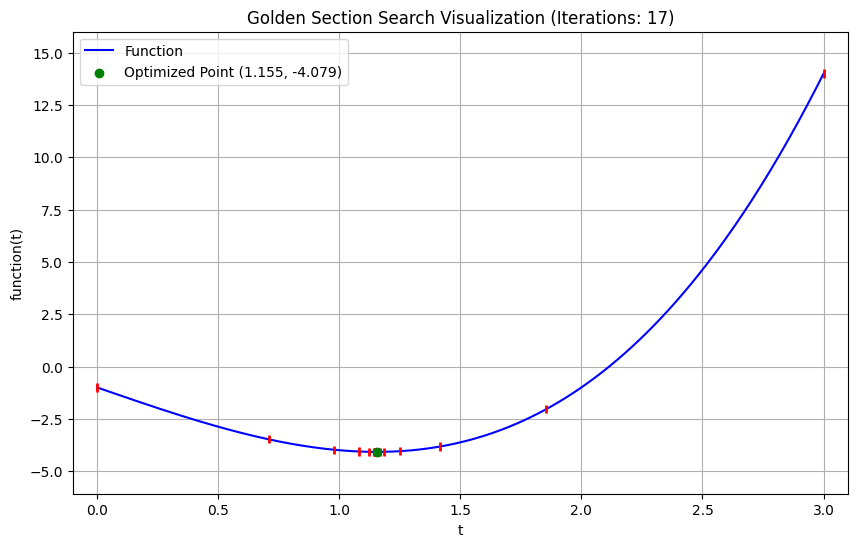

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Plotting
t = np.linspace(left_point, right_point, 400)
y = function(t)

fig, ax = plt.subplots(figsize=(10, 6))
    
# Plot the function
ax.plot(t, y, label='Function', color='blue')
    
# Plot the golden section points
points_x, points_y = zip(*points)
points_segments = [[(x, y+0.2), (x, y-0.2)] for x, y in zip(points_x, points_y)]
points_collection = LineCollection(points_segments, colors='red', linewidths=2)
ax.add_collection(points_collection)

# Highlight the optimized point
ax.scatter([optimized_point], [optimized_number], color='green', label=f'Optimized Point ({optimized_point:.3f}, {optimized_number:.3f})', zorder=5)
    
# Plot settings
ax.set_xlim(left_point-0.1, right_point+0.1)
ax.set_ylim(min(y)-2, max(y)+2)
ax.set_xlabel('t')
ax.set_ylabel('function(t)')
ax.legend()
plt.title(f"Golden Section Search Visualization (Iterations: {times})")
plt.grid(True)
plt.savefig("./result.jpg", dpi=1000)
plt.show()